In [1]:
%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20120101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   

In [5]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2017-06-02 16:07:31.265000	开始载入数据
2017-06-02 16:07:31.423000	载入完成，数据量：331890
2017-06-02 16:07:31.423000	开始回测
2017-06-02 16:07:31.441000	策略初始化完成
2017-06-02 16:07:31.441000	策略启动完成
2017-06-02 16:07:31.442000	开始回放数据
2017-06-02 16:07:54.738000	数据回放结束


2017-06-02 16:09:14.068000	计算回测结果
2017-06-02 16:09:14.134000	------------------------------
2017-06-02 16:09:14.134000	第一笔交易：	2012-01-11 10:18:00
2017-06-02 16:09:14.134000	最后一笔交易：	2017-03-20 09:31:00
2017-06-02 16:09:14.134000	总交易次数：	3,749.0
2017-06-02 16:09:14.134000	总盈亏：	683,717.31
2017-06-02 16:09:14.134000	最大回撤: 	-215,542.46
2017-06-02 16:09:14.134000	平均每笔盈利：	182.37
2017-06-02 16:09:14.134000	平均每笔滑点：	120.0
2017-06-02 16:09:14.134000	平均每笔佣金：	57.75
2017-06-02 16:09:14.134000	胜率		37.24%
2017-06-02 16:09:14.134000	盈利交易平均值	8,539.01
2017-06-02 16:09:14.134000	亏损交易平均值	-4,775.5
2017-06-02 16:09:14.134000	盈亏比：	1.79


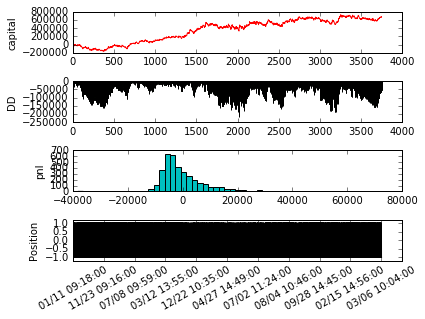

In [7]:
# 显示回测结果
engine.showBacktestingResult()

In [8]:
# 显示前10条成交记录
for i in range(10):
    print engine.tradeDict[str(i+1)].__dict__

{'orderID': '1', 'direction': u'\u591a', 'gatewayName': '', 'tradeID': '1', 'exchange': '', 'symbol': '', 'volume': 0, 'tradeTime': '2012-01-11 09:18:00', 'rawData': None, 'vtTradeID': '1', 'offset': u'\u5f00\u4ed3', 'vtOrderID': '1', 'dt': datetime.datetime(2012, 1, 11, 9, 18), 'price': 2464.4, 'vtSymbol': ''}
{'orderID': '2', 'direction': u'\u7a7a', 'gatewayName': '', 'tradeID': '2', 'exchange': '', 'symbol': '', 'volume': 0, 'tradeTime': '2012-01-11 10:18:00', 'rawData': None, 'vtTradeID': '2', 'offset': u'\u5e73\u4ed3', 'vtOrderID': '2', 'dt': datetime.datetime(2012, 1, 11, 10, 18), 'price': 2448.8, 'vtSymbol': ''}
{'orderID': '3', 'direction': u'\u7a7a', 'gatewayName': '', 'tradeID': '3', 'exchange': '', 'symbol': '', 'volume': 0, 'tradeTime': '2012-01-11 10:19:00', 'rawData': None, 'vtTradeID': '3', 'offset': u'\u5f00\u4ed3', 'vtOrderID': '3', 'dt': datetime.datetime(2012, 1, 11, 10, 19), 'price': 2448.4, 'vtSymbol': ''}
{'orderID': '4', 'direction': u'\u591a', 'gatewayName': '',

In [11]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('capital')            # 设置优化排序的目标是策略净盈利
setting.addParameter('atrLength', 12, 20, 2)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
engine.runParallelOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)

2017-06-02 16:13:08.744000	------------------------------
2017-06-02 16:13:08.744000	优化结果：
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 20}: 957797.864155
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 25, 'atrLength': 20}: 957797.864155
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 30, 'atrLength': 20}: 957797.864155
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 18}: 883361.518728
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 25, 'atrLength': 18}: 883361.518728
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 30, 'atrLength': 18}: 883361.518728
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 16}: 790520.582818
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 25, 'atrLength': 16}: 790520.582818
2017-06-02 16:13:08.744000	{'rsiLength': 5, 'atrMa': 30, 'atrLength': 16}: 790520.582818
2017-06-02 16:13:08.745000	{'rsiLength': 5, 'atrMa': 20, 'atrLength': 14}: 768931.704634
2017-06-02 16:13:08

NameError: name 'start' is not defined